<a href="https://colab.research.google.com/github/TanushGoel/Machine-Learning-Playground/blob/master/Skin_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 install tensorflow==1.14.0

In [0]:
!pip3 install keras

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from os.path import isfile
import tensorflow as tf
import keras
from keras.utils import np_utils
import itertools
import shutil
np.random.seed(42)
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [0]:
tf.__version__

'1.14.0'

In [0]:
tf.keras.__version__

'2.2.4-tf'

In [0]:
# upload zipped files and HAM1000_metadata.csv before this step
!unzip -o HAM10000_images_part_1.zip
!unzip -o HAM10000_images_part_2.zip

# -f  freshen existing files, create none
# -n  never overwrite existing files         
# -q  quiet mode (-qq => quieter)
# -o  overwrite files WITHOUT prompting    

Archive:  HAM10000_images_part_1.zip
  inflating: ISIC_0024306.jpg        
  inflating: ISIC_0024307.jpg        
  inflating: ISIC_0024308.jpg        
  inflating: ISIC_0024309.jpg        
  inflating: ISIC_0024310.jpg        
  inflating: ISIC_0024311.jpg        
  inflating: ISIC_0024312.jpg        
  inflating: ISIC_0024313.jpg        
  inflating: ISIC_0024314.jpg        
  inflating: ISIC_0024315.jpg        
  inflating: ISIC_0024316.jpg        
  inflating: ISIC_0024317.jpg        
  inflating: ISIC_0024318.jpg        
  inflating: ISIC_0024319.jpg        
  inflating: ISIC_0024320.jpg        
  inflating: ISIC_0024321.jpg        
  inflating: ISIC_0024322.jpg        
  inflating: ISIC_0024323.jpg        
  inflating: ISIC_0024324.jpg        
  inflating: ISIC_0024325.jpg        
  inflating: ISIC_0024326.jpg        
  inflating: ISIC_0024327.jpg        
  inflating: ISIC_0024328.jpg        
  inflating: ISIC_0024329.jpg        
  inflating: ISIC_0024330.jpg        
  inflating: 

In [0]:
df_data = pd.read_csv('HAM10000_metadata.csv')
df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


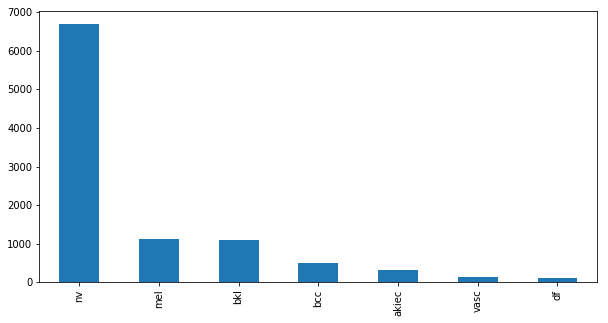

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
df_data['dx'].value_counts().plot(kind='bar', ax=ax)

In [0]:
print(df_data.dx.value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [0]:
# 7 types of cancer classified:
# actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec)
# basal cell carcinoma (bcc) 
# benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl) 
# dermatofibroma (df) 
# melanoma (mel) - most serious - 5 year survival rate for stage 4 melanoma is about 15-20% - stage 4 can develop within less than a year
# melanocytic nevi (nv) 
# vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc)

# There are three types of skin cells: basal cells, squamous cells, and melanocytes

In [0]:
# Create a new directory

base_dir = 'base_dir'
os.mkdir(base_dir)


# Create a path to 'base_dir' to which we will join the names of the new folders

# train_dir
train_dir = os.path.join(base_dir, 'train_dir')
os.mkdir(train_dir)

# val_dir
val_dir = os.path.join(base_dir, 'val_dir')
os.mkdir(val_dir)

# test_dir
test_dir = os.path.join(base_dir, 'test_dir')
os.mkdir(test_dir)


# Create folders within the train, valid, and test folders
# Inside each folder we create seperate folders for each class

# create new folders inside train_dir
nv = os.path.join(train_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(train_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(train_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(train_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(train_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(train_dir, 'vasc')
os.mkdir(vasc)
d_f = os.path.join(train_dir, 'df')
os.mkdir(d_f)


# Create new folders inside val_dir
nv = os.path.join(val_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(val_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(val_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(val_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(val_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(val_dir, 'vasc')
os.mkdir(vasc)
d_f = os.path.join(val_dir, 'df')
os.mkdir(d_f)


# Create new folders inside test_dir
nv = os.path.join(test_dir, 'nv')
os.mkdir(nv)
mel = os.path.join(test_dir, 'mel')
os.mkdir(mel)
bkl = os.path.join(test_dir, 'bkl')
os.mkdir(bkl)
bcc = os.path.join(test_dir, 'bcc')
os.mkdir(bcc)
akiec = os.path.join(test_dir, 'akiec')
os.mkdir(akiec)
vasc = os.path.join(test_dir, 'vasc')
os.mkdir(vasc)
d_f = os.path.join(test_dir, 'df')
os.mkdir(d_f)

In [0]:
# This will tell us how many images are associated with each lesion_id
df = df_data.groupby('lesion_id').count()

# Now we filter out lesion_id's that have only one image associated with it
df = df[df['image_id'] == 1]

df.reset_index(inplace=True)

df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000001,1,1,1,1,1,1
1,HAM_0000003,1,1,1,1,1,1
2,HAM_0000004,1,1,1,1,1,1
3,HAM_0000007,1,1,1,1,1,1
4,HAM_0000008,1,1,1,1,1,1


In [0]:
# Here we identify lesion_id's that have duplicate images and those that have only one image

def identify_duplicates(x):
    
    unique_list = list(df['lesion_id'])
    
    if x in unique_list:
        return 'no_duplicates'
    else:
        return 'has_duplicates'
    
# create a new colum that is a copy of the lesion_id column
df_data['duplicates'] = df_data['lesion_id']
# apply the function to this new column
df_data['duplicates'] = df_data['duplicates'].apply(identify_duplicates)

df_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,duplicates
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,has_duplicates
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,has_duplicates
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,has_duplicates
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,has_duplicates
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,has_duplicates


In [0]:
df_data['duplicates'].value_counts()

no_duplicates     5514
has_duplicates    4501
Name: duplicates, dtype: int64

In [0]:
# Now we filter out images that don't have duplicates
df = df_data[df_data['duplicates'] == 'no_duplicates']

df.shape

(5514, 8)

In [0]:
# Now we create a val set using df because we are sure that none of these images have augmented duplicates in the train set
y = df['dx']

from sklearn.model_selection import train_test_split

_, df_test = train_test_split(df, test_size=0.04975, random_state=42, stratify=y)

_, df_val = train_test_split(df, test_size=0.018, random_state=42, stratify=y)

print('Valid:', df_val.shape[0])
print('Test:', df_test.shape[0])

Valid: 100
Test: 275


In [0]:
df_val['dx'].value_counts()

nv       80
bkl       8
mel       4
akiec     3
bcc       3
df        1
vasc      1
Name: dx, dtype: int64

In [0]:
df_test['dx'].value_counts()

nv       220
bkl       22
mel       11
bcc        9
akiec      8
vasc       3
df         2
Name: dx, dtype: int64

In [0]:
# This set will be df_data excluding all rows that are in the val set/test set

# This function identifies if an image is part of the train
# or val set.
def identify_train_val_and_test_rows(x):
    # create a list of all the lesion_id's in the val set/test set
    val_list = list(df_val['image_id'])
    test_list = list(df_test['image_id'])
    
    if str(x) in val_list:
        return 'val'
    if str(x) in test_list:
        return 'test'
    else:
        return 'train'

# identify train rows, val rows, and test rows

# create a new colum that is a copy of the image_id column
df_data['train_or_val'] = df_data['image_id']
# apply the function to this new column
df_data['train_or_val'] = df_data['train_or_val'].apply(identify_train_val_and_test_rows)
   
# filter out train rows
df_train = df_data[df_data['train_or_val'] == 'train']


print('Train:', len(df_train))
print('Valid:', len(df_val))
print('Test:', len(df_test))

Train: 9740
Valid: 100
Test: 275


In [0]:
df_train['dx'].value_counts()

nv       6485
mel      1102
bkl      1077
bcc       505
akiec     319
vasc      139
df        113
Name: dx, dtype: int64

In [0]:
df_val['dx'].value_counts()

nv       80
bkl       8
mel       4
akiec     3
bcc       3
df        1
vasc      1
Name: dx, dtype: int64

In [0]:
df_test['dx'].value_counts()

nv       220
bkl       22
mel       11
bcc        9
akiec      8
vasc       3
df         2
Name: dx, dtype: int64

In [0]:
# Set the image_id as the index in df_data
df_data.set_index('image_id', inplace=True)

In [0]:
# Get a list of train, val, and test images
train_list = list(df_train['image_id'])
val_list = list(df_val['image_id'])
test_list = list(df_test['image_id'])

# Transfer the train images

for image in train_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    # destination path to image
    dst = os.path.join(train_dir, label, fname)
    # copy the image from the source to the destination
    shutil.copyfile(fname, dst)


# Transfer the val images

for image in val_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    # destination path to image
    dst = os.path.join(val_dir, label, fname)
    # copy the image from the source to the destination
    shutil.copyfile(fname, dst)
    
    
# Transfer the test images
for image in test_list:
    
    fname = image + '.jpg'
    label = df_data.loc[image,'dx']
    
    # destination path to image
    dst = os.path.join(test_dir, label, fname)
    # copy the image from the source to the destination
    shutil.copyfile(fname, dst)

In [0]:
# Check how many train images we have in each folder

print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

6485
1102
1077
505
319
139
113


In [0]:
# Check how many val images we have in each folder

print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

80
4
8
3
3
1
1


In [0]:
# Check how many val images we have in each folder

print(len(os.listdir('base_dir/test_dir/nv')))
print(len(os.listdir('base_dir/test_dir/mel')))
print(len(os.listdir('base_dir/test_dir/bkl')))
print(len(os.listdir('base_dir/test_dir/bcc')))
print(len(os.listdir('base_dir/test_dir/akiec')))
print(len(os.listdir('base_dir/test_dir/vasc')))
print(len(os.listdir('base_dir/test_dir/df')))

220
11
22
9
8
3
2


In [0]:
# size of image
image_size = 224

# note that we are not augmenting class 'nv'
class_list = ['mel','bkl','bcc','akiec','vasc','df']

from keras.preprocessing.image import ImageDataGenerator

for item in class_list:
    
    # We are creating temporary directories here because we delete these directories later
    aug_dir = 'aug_dir'
    os.mkdir(aug_dir)
    # create a dir within the base dir to store images of the same class
    img_dir = os.path.join(aug_dir, 'img_dir')
    os.mkdir(img_dir)

    # Choose a class
    img_class = item

    # list all images in that directory
    img_list = os.listdir('base_dir/train_dir/' + img_class)

    # Copy images from the class train dir to the img_dir e.g. class 'mel'
    for fname in img_list:
            # source path to image
            src = os.path.join('base_dir/train_dir/' + img_class, fname)
            # destination path to image
            dst = os.path.join(img_dir, fname)
            # copy the image from the source to the destination
            shutil.copyfile(src, dst)


    # point to a dir containing the images and not to the images themselves
    path = aug_dir
    save_path = 'base_dir/train_dir/' + img_class

    # Create a data generator
    datagen = ImageDataGenerator(
        rotation_range=180,
        width_shift_range=0.15,
        height_shift_range=0.15,
        zoom_range=0.125,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

    batch_size = 50
    
    aug_datagen = datagen.flow_from_directory(path,
                                              save_to_dir=save_path,
                                              save_format='jpg',
                                              target_size=(image_size, image_size),
                                              batch_size=batch_size)


    # Generate the augmented images and add them to the training folders
    
    num_aug_images_wanted = 6000 # total number of images we want to have in each class
    
    num_files = len(os.listdir(img_dir))
    num_batches = int(np.ceil((num_aug_images_wanted-num_files)/batch_size))

    # run the generator and create augmented images
    for i in range(0, num_batches):

        imgs, labels = next(aug_datagen)
        
    # delete temporary directory with the raw image files
    shutil.rmtree('aug_dir')

Found 1102 images belonging to 1 classes.
Found 1077 images belonging to 1 classes.
Found 505 images belonging to 1 classes.
Found 319 images belonging to 1 classes.
Found 139 images belonging to 1 classes.
Found 113 images belonging to 1 classes.


In [0]:
# Check how many train images we now have in each folder.
# This is the original images plus the augmented images.

print(len(os.listdir('base_dir/train_dir/nv')))
print(len(os.listdir('base_dir/train_dir/mel')))
print(len(os.listdir('base_dir/train_dir/bkl')))
print(len(os.listdir('base_dir/train_dir/bcc')))
print(len(os.listdir('base_dir/train_dir/akiec')))
print(len(os.listdir('base_dir/train_dir/vasc')))
print(len(os.listdir('base_dir/train_dir/df')))

6485
5810
5935
5555
5523
5610
4570


In [0]:
# Check how many val images we have in each folder.

print(len(os.listdir('base_dir/val_dir/nv')))
print(len(os.listdir('base_dir/val_dir/mel')))
print(len(os.listdir('base_dir/val_dir/bkl')))
print(len(os.listdir('base_dir/val_dir/bcc')))
print(len(os.listdir('base_dir/val_dir/akiec')))
print(len(os.listdir('base_dir/val_dir/vasc')))
print(len(os.listdir('base_dir/val_dir/df')))

80
4
8
3
3
1
1


In [0]:
# Check how many val images we have in each folder.

print(len(os.listdir('base_dir/test_dir/nv')))
print(len(os.listdir('base_dir/test_dir/mel')))
print(len(os.listdir('base_dir/test_dir/bkl')))
print(len(os.listdir('base_dir/test_dir/bcc')))
print(len(os.listdir('base_dir/test_dir/akiec')))
print(len(os.listdir('base_dir/test_dir/vasc')))
print(len(os.listdir('base_dir/test_dir/df')))

220
11
22
9
8
3
2


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


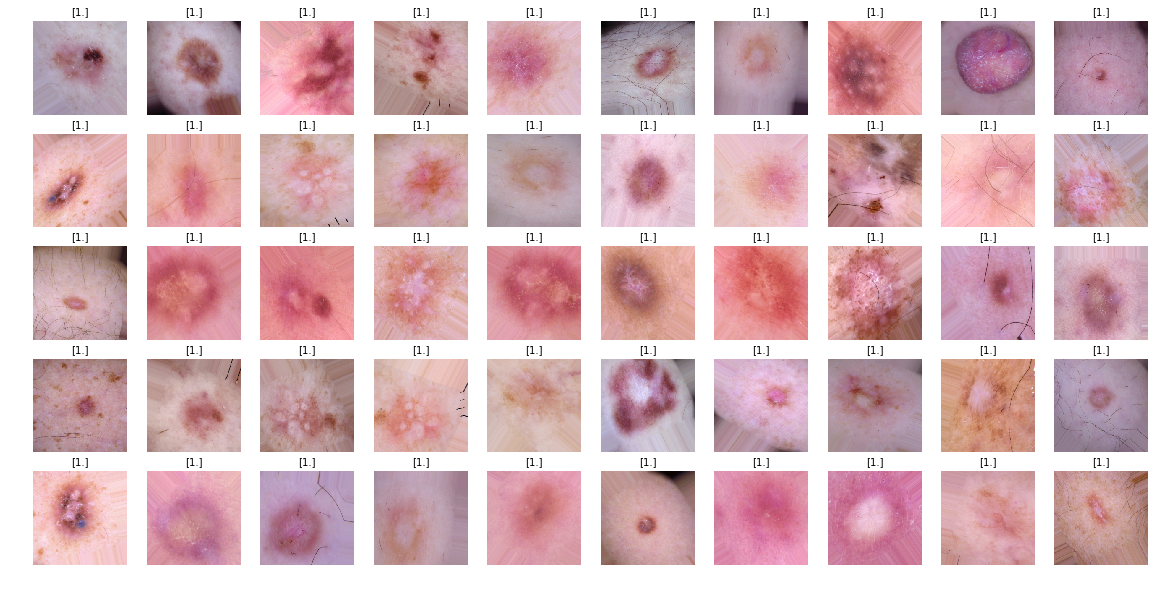

In [0]:
def plots(ims, figsize=(20,10), rows=5, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=10)
        plt.imshow(ims[i], interpolation=None)
        
plots(imgs, titles=labels)

In [0]:
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'
test_path = 'base_dir/test_dir'

num_train_samples = len(df_train)
num_val_samples = len(df_val)

train_batch_size = 64
val_batch_size = 64

train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [0]:
datagen = ImageDataGenerator(preprocessing_function=keras.applications.inception_v3.preprocess_input)

train_batches_bench = datagen.flow_from_directory(train_path,
                                                  target_size=(image_size,image_size),
                                                  batch_size=train_batch_size)

valid_batches_bench = datagen.flow_from_directory(valid_path,
                                                  target_size=(image_size,image_size),
                                                  batch_size=val_batch_size)

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches_bench = datagen.flow_from_directory(test_path,
                                                 target_size=(image_size,image_size),
                                                 batch_size=1,
                                                 shuffle=False)

Found 39488 images belonging to 7 classes.
Found 100 images belonging to 7 classes.
Found 275 images belonging to 7 classes.


In [0]:
# Get the labels that are associated with each index
print(valid_batches_bench.class_indices)

{'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6}


In [0]:
# Add weights to try to make the model more sensitive to certain classes

# log(total/class#)
# class_weights={
#   0: 1.48610320097, # akiec
#   1: 1.28968783464, # bcc
#   2: 0.959653261206, # bkl
#   3: 1.93995311328, # df
#   4: 0.954155789295, # mel
#   5: 0.174252171442, # nv
#   6: 1.84836260925, # vasc
# }

class_weights={
    0: 1.5, # akiec
    1: 1.3, # bcc
    2: 1, # bkl
    3: 2, # df
    4: 1, # mel
    5: 0.2, # nv
    6: 1.85, # vasc
}

In [0]:
# Build Benchmark Model
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Activation, GlobalAveragePooling2D
from keras import regularizers
from keras.optimizers import Adam

benchmark = Sequential()
benchmark.add(Conv2D(16, kernel_size=3, activation='relu', padding='valid', input_shape=(image_size, image_size, 3)))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='valid'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(32, kernel_size=3, activation='relu', padding='valid'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Conv2D(64, kernel_size=3, activation='relu', padding='valid'))
benchmark.add(MaxPooling2D(pool_size=2))
benchmark.add(Dropout(0.3))
benchmark.add(Flatten())
benchmark.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
benchmark.add(Dropout(0.5))
benchmark.add(Dense(7, activation='softmax'))
benchmark.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_214 (Conv2D)          (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_215 (Conv2D)          (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_216 (Conv2D)          (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 24, 24, 64)        18496     
__________

In [0]:
# Compile Benchmark Model
from keras import metrics
benchmark.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy', metrics.categorical_accuracy, 'mse'])

In [0]:
# Checkpointer
from keras.callbacks import ModelCheckpoint
checkpointer_benchmark = ModelCheckpoint(filepath='skin_cancer_bench_best.hdf5', verbose=1, save_best_only=True)

# Train Model
history_benchmark = benchmark.fit_generator(train_batches_bench, 
                                            steps_per_epoch=train_steps, 
                                            class_weight=class_weights,
                                            validation_data=valid_batches_bench,
                                            validation_steps=val_steps,
                                            callbacks=[checkpointer_benchmark], 
                                            epochs=50, 
                                            verbose=1)

Epoch 1/50
153/153 [==============================] - 39s 256ms/step - loss: 2.3657 - acc: 0.3085 - categorical_accuracy: 0.3085 - mean_squared_error: 0.1130 - val_loss: 2.0018 - val_acc: 0.3000 - val_categorical_accuracy: 0.3000 - val_mean_squared_error: 0.1203

Epoch 00001: val_loss improved from inf to 2.00179, saving model to skin_cancer_bench_best.hdf5
Epoch 2/50
153/153 [==============================] - 32s 210ms/step - loss: 1.8053 - acc: 0.3930 - categorical_accuracy: 0.3930 - mean_squared_error: 0.1023 - val_loss: 2.2959 - val_acc: 0.2900 - val_categorical_accuracy: 0.2900 - val_mean_squared_error: 0.1260

Epoch 00002: val_loss did not improve from 2.00179
Epoch 3/50
153/153 [==============================] - 35s 228ms/step - loss: 1.7599 - acc: 0.4160 - categorical_accuracy: 0.4160 - mean_squared_error: 0.1003 - val_loss: 2.2453 - val_acc: 0.2600 - val_categorical_accuracy: 0.2600 - val_mean_squared_error: 0.1324

Epoch 00003: val_loss did not improve from 2.00179
Epoch 4/50

In [0]:
def plot_training(history):
  
    acc = history.history['acc'] 
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs  = range(len(acc))
    
    plt.plot(epochs,acc, 'b')
    plt.plot(epochs,val_acc, 'r')
    plt.title("Training & Validation Accuracy")
    
    plt.figure()
    plt.plot(epochs, loss, 'b')
    plt.plot(epochs, val_loss, 'r')
    plt.title("Training & Validation Loss")
    
    plt.show()

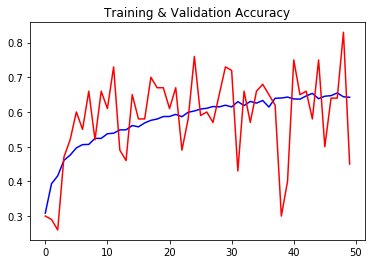

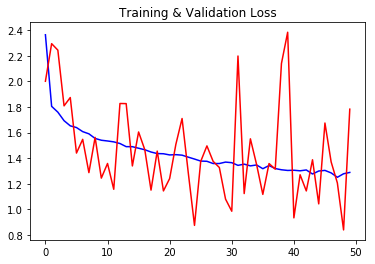

In [0]:
plot_training(history_benchmark)

In [0]:
# Load Weights of the Baseline Model
benchmark.load_weights('skin_cancer_bench_best.hdf5')

In [0]:
# Test Predictions
preds = benchmark.predict_generator(test_batches_bench, steps=len(df_test), verbose=1)

275/275 [==============================] - 4s 15ms/step


In [0]:
# Take the highest probability scores to get index of predictions for test images
y_pred = np.argmax(preds, axis=1)

# Get labels of test images
y_true = test_batches_bench.classes

In [0]:
# Evaluate
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_true, y_pred):1.3f}%')

from sklearn.metrics import balanced_accuracy_score
print(f'Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):1.3f}%')
# Balanced accuracy is calculated as the average of the proportion correct of each class individually

Accuracy: 0.727%
Balanced Accuracy: 0.422%


In [0]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

def matrix():
  conf_matrix = confusion_matrix(y_true, y_pred)
  plt.imshow(conf_matrix, interpolation='nearest', cmap='viridis')
  plt.title('Confusion matrix')
  plt.colorbar()
  tick_marks = np.arange(len(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']))
  plt.xticks(tick_marks, ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
  plt.yticks(tick_marks, ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.tight_layout()

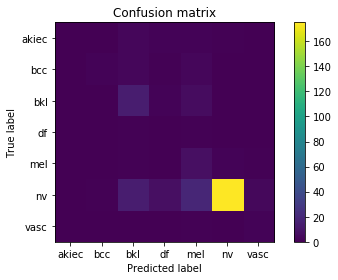

In [0]:
matrix()

In [0]:
confusionmatrix = confusion_matrix(y_true, y_pred)
confusionmatrix

array([[  0,   0,   3,   2,   2,   1,   0],
       [  0,   2,   3,   1,   3,   0,   0],
       [  0,   0,  14,   2,   6,   0,   0],
       [  0,   0,   1,   0,   1,   0,   0],
       [  0,   0,   1,   0,   7,   2,   1],
       [  0,   1,  14,   7,  19, 175,   4],
       [  0,   0,   0,   0,   1,   0,   2]])

In [0]:
# Classification Report

from sklearn.metrics import classification_report
report = classification_report(y_true=y_true, y_pred=y_pred, target_names=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
print(report)

              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00         8
         bcc       0.67      0.22      0.33         9
         bkl       0.39      0.64      0.48        22
          df       0.00      0.00      0.00         2
         mel       0.18      0.64      0.28        11
          nv       0.98      0.80      0.88       220
        vasc       0.29      0.67      0.40         3

    accuracy                           0.73       275
   macro avg       0.36      0.42      0.34       275
weighted avg       0.85      0.73      0.77       275



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# Load Pre-Trained Model
from keras.applications.inception_v3 import InceptionV3
base = InceptionV3(include_top=False, weights='imagenet', pooling=None, input_shape=(image_size, image_size, 3))

In [0]:
# Build Transfer Learning Model

from keras.models import Model

last = base.output
x = GlobalAveragePooling2D()(last)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
preds = Dense(7, activation='softmax')(x)

model = Model(base.input, preds)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_218 (Conv2D)             (None, 111, 111, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, 111, 111, 32) 96          conv2d_218[0][0]                 
__________________________________________________________________________________________________
activation_189 (Activation)     (None, 111, 111, 32) 0           batch_normalization_189[0][0]    
__________________________________________________________________________________________________
conv2d_219

In [0]:
# Load Weights of the Benchmark Model
base.load_weights('skin_cancer_bench_best.hdf5', by_name=True)

In [0]:
# How many layers Base Model has
print(len(base.layers))

311


In [0]:
# Freeze original layers of Base Model
for layer in base.layers:
    layer.trainable = False

In [0]:
# Compile Transfer Learning Model
from keras import metrics
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy', metrics.categorical_accuracy, 'mse'])

In [0]:
datagen = ImageDataGenerator(preprocessing_function=keras.applications.inception_v3.preprocess_input)

train_batches_transfer = datagen.flow_from_directory(train_path,
                                                     target_size=(image_size,image_size),
                                                     batch_size=train_batch_size)

valid_batches_transfer = datagen.flow_from_directory(valid_path,
                                                     target_size=(image_size,image_size),
                                                     batch_size=val_batch_size)

# Note: shuffle=False causes the test dataset to not be shuffled
test_batches_transfer = datagen.flow_from_directory(test_path,
                                                    target_size=(image_size,image_size),
                                                    batch_size=1,
                                                    shuffle=False)

Found 39488 images belonging to 7 classes.
Found 100 images belonging to 7 classes.
Found 275 images belonging to 7 classes.


In [0]:
# Checkpointer
checkpointer_transfer = ModelCheckpoint(filepath='skin_cancer_transfer_best.hdf5', verbose=1, save_best_only=True)

# Train Model
history_transfer = model.fit_generator(train_batches_transfer, 
                                       steps_per_epoch=train_steps, 
                                       class_weight=class_weights,
                                       validation_data=valid_batches_transfer,
                                       validation_steps=val_steps,
                                       callbacks=[checkpointer_transfer], 
                                       epochs=25, 
                                       verbose=1)

Epoch 1/25
153/153 [==============================] - 48s 316ms/step - loss: 2.0662 - acc: 0.2945 - categorical_accuracy: 0.2945 - mean_squared_error: 0.1192 - val_loss: 3.0112 - val_acc: 0.0300 - val_categorical_accuracy: 0.0300 - val_mean_squared_error: 0.1779

Epoch 00001: val_loss improved from inf to 3.01125, saving model to skin_cancer_transfer_best.hdf5
Epoch 2/25
153/153 [==============================] - 35s 227ms/step - loss: 1.7072 - acc: 0.3956 - categorical_accuracy: 0.3956 - mean_squared_error: 0.1047 - val_loss: 1.3142 - val_acc: 0.5500 - val_categorical_accuracy: 0.5500 - val_mean_squared_error: 0.0912

Epoch 00002: val_loss improved from 3.01125 to 1.31425, saving model to skin_cancer_transfer_best.hdf5
Epoch 3/25
153/153 [==============================] - 37s 244ms/step - loss: 1.5744 - acc: 0.4570 - categorical_accuracy: 0.4570 - mean_squared_error: 0.0964 - val_loss: 3.1472 - val_acc: 0.0900 - val_categorical_accuracy: 0.0900 - val_mean_squared_error: 0.1806

Epoch 

In [0]:
# Load Weights of the Transfer Learning Model
model.load_weights('skin_cancer_transfer_best.hdf5')

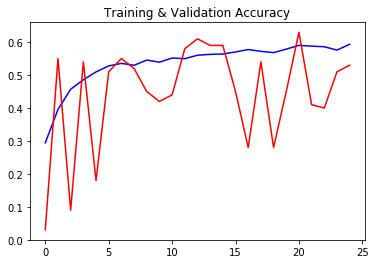

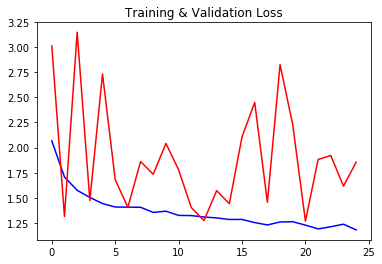

In [0]:
plot_training(history_transfer)

In [0]:
# Test Predictions
preds = model.predict_generator(test_batches_transfer, steps=len(df_test), verbose=1)

275/275 [==============================] - 7s 25ms/step


In [0]:
# Take the highest probability scores to get index of predictions for test images
y_pred = np.argmax(preds, axis=1)

# Get labels of test images
y_true = test_batches_transfer.classes

In [0]:
# Evaluate
from sklearn.metrics import accuracy_score
print(f'Accuracy: {accuracy_score(y_true, y_pred):1.3f}%')

from sklearn.metrics import balanced_accuracy_score
print(f'Balanced Accuracy: {balanced_accuracy_score(y_true, y_pred):1.3f}%')
# Balanced accuracy is calculated as the average of the proportion corrects of each class individually

Accuracy: 0.669%
Balanced Accuracy: 0.364%


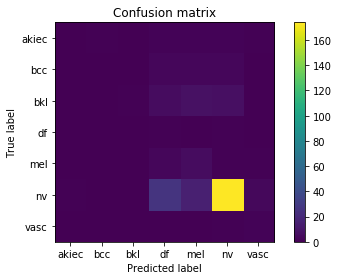

In [0]:
matrix()

In [0]:
confusionmatrix = confusion_matrix(y_true, y_pred)
confusionmatrix

array([[  0,   1,   0,   2,   2,   2,   1],
       [  0,   0,   0,   3,   3,   3,   0],
       [  0,   0,   1,   6,   8,   7,   0],
       [  0,   0,   0,   1,   0,   1,   0],
       [  0,   0,   0,   3,   6,   1,   1],
       [  1,   0,   0,  26,  15, 174,   4],
       [  0,   0,   0,   0,   0,   1,   2]])

In [0]:
# Classification Report

from sklearn.metrics import classification_report
report = classification_report(y_true=y_true, y_pred=y_pred, target_names=['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'])
print(report)

              precision    recall  f1-score   support

       akiec       0.00      0.00      0.00         8
         bcc       0.00      0.00      0.00         9
         bkl       1.00      0.05      0.09        22
          df       0.02      0.50      0.05         2
         mel       0.18      0.55      0.27        11
          nv       0.92      0.79      0.85       220
        vasc       0.25      0.67      0.36         3

    accuracy                           0.67       275
   macro avg       0.34      0.36      0.23       275
weighted avg       0.83      0.67      0.70       275

